In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool


In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


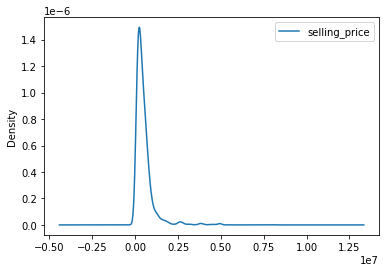

In [8]:
df1=pd.DataFrame(df['selling_price'])
df1.plot.density()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['fuel']=encoder.fit_transform(df['fuel'])
df['seller_type']=encoder.fit_transform(df['seller_type'])
df['transmission']=encoder.fit_transform(df['fuel'])
df['owner']=encoder.fit_transform(df['owner'])

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,4,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,4,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,4,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [11]:
X = df.iloc[:, [0,1,3,4,5,6,7]].values
y = df.iloc[:, -6].values

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
X

array([[0.0, 0.0, 0.0, ..., 1, 4, 0],
       [0.0, 0.0, 0.0, ..., 1, 4, 0],
       [0.0, 0.0, 0.0, ..., 1, 1, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 4, 2],
       [0.0, 0.0, 0.0, ..., 1, 1, 0],
       [0.0, 0.0, 0.0, ..., 1, 4, 0]], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
print(y_pred[0:10])

[ 518455.07873535 1581952.37609863   61340.45581055 4948206.14831543
  124770.28149414  263109.89953613  454437.74536133  180613.40771484
  772534.68518066  324917.11877441]


In [18]:
print(y_test[0:10])

[ 465000 1580000  150000 4950000  125000  220000  450000  190000  740000
  300000]


In [19]:
print(y_pred[137])
print(y_test[137])

108819.85131835938
120000
